In [142]:
import requests
from bs4 import BeautifulSoup as soup
from random import randint
from time import sleep

# Get request from url
a = 'https://www.tripadvisor.com/Hotel_Review-g297628-d10639254-Reviews-Lords_Eco_Inn_Jayanagar-Bengaluru_Bangalore_District_Karnataka.html'
a = a[:(a.find('Reviews')+7)] + '-or{}' + a[(a.find('Reviews')+7):]

reviews = []

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'}

html = requests.get(a, headers = headers)
element = soup(html.content, 'lxml')

#Extracting number of review
no_review = element.findAll('span', class_ = "HFUqL")
no_review1 = no_review[0].text.replace(" reviews", "") # Deleting 'review' 
no_review2 = int(no_review1.replace(",", "")) # Deleting ','
print("There are",no_review2,"reviews in this hotel")
    
for i in range((no_review2//5)+1):
    j = 5*i
    a_new = a.replace("{}",str(j))
    html = requests.get(a_new, headers = headers)
    sleep(1)
    bsobj = soup(html.content, 'lxml')
    
    

    for r in bsobj.findAll('q'):
        reviews.append(r.span.text.strip())

print("Review scrapping completed!")

There are 62 reviews in this hotel
Review scrapping completed!


In [146]:
res = []
for i in reviews:
    if i not in res:
        res.append(i)

In [184]:
print("------------------------------")
print("Printing the reviews")
print("------------------------------")
for i in range(len(res)):
    print(res[i],"\n")

------------------------------
Printing the reviews
------------------------------
Here i stayed with my family for a week, their hospitility is supremly amazing, helpful staff, delicious food and clean room, highly recommended to people those who are looking for a decent stay near Jayanagar 

Beautiful place, clean and hygienic room, professional and courteous staff, mouthwatering and delicious food, highly recommended to those who is looking for a decent and budget friendly hotel in Jayanagar 

My experience with Lord Eco Inn is extremely great , I stayed here 7 nights , beautiful place with supportive staff who are always ready to help u . They have an inhouse restaurant where they serve delicious & hygienic food . 

Always had an amazing experience whenever I stay here. Totally love this place and ambience is highly upto the mark , staffs are always concern ur needs and ready to help u always . strongly recommend to those who has not visited a homly experience 

Had a great stay, b

# Data cleaning

In [149]:
import pandas as pd
from string import *

In [150]:
d = {'review': res}
df = pd.DataFrame(data=d)
df

,review
0,"Here i stayed with my family for a week, their..."
1,"Beautiful place, clean and hygienic room, prof..."
2,My experience with Lord Eco Inn is extremely g...
3,Always had an amazing experience whenever I st...
4,"Had a great stay, beautiful place and tasty fo..."
...,...
57,It is a boutique hotel with excellent homely a...
58,We stayed here for our official visit. All sta...
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo..."
60,I stayed at this hotel when it was just openin...


## Lowercase

In [151]:
df['review_old'] = df['review'].apply(lambda x: " ".join(x.lower() 
for x in x.split()))
df

,review,review_old
0,"Here i stayed with my family for a week, their...","here i stayed with my family for a week, their..."
1,"Beautiful place, clean and hygienic room, prof...","beautiful place, clean and hygienic room, prof..."
2,My experience with Lord Eco Inn is extremely g...,my experience with lord eco inn is extremely g...
3,Always had an amazing experience whenever I st...,always had an amazing experience whenever i st...
4,"Had a great stay, beautiful place and tasty fo...","had a great stay, beautiful place and tasty fo..."
...,...,...
57,It is a boutique hotel with excellent homely a...,it is a boutique hotel with excellent homely a...
58,We stayed here for our official visit. All sta...,we stayed here for our official visit. all sta...
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo...","have stayed at lords eco inn jayanagar, banglo..."
60,I stayed at this hotel when it was just openin...,i stayed at this hotel when it was just openin...


## Removing punctuation

In [152]:
df['review_new'] = df['review_old'].str.replace('[^\w\s]',"", regex=True)

In [153]:
df

,review,review_old,review_new
0,"Here i stayed with my family for a week, their...","here i stayed with my family for a week, their...",here i stayed with my family for a week their ...
1,"Beautiful place, clean and hygienic room, prof...","beautiful place, clean and hygienic room, prof...",beautiful place clean and hygienic room profes...
2,My experience with Lord Eco Inn is extremely g...,my experience with lord eco inn is extremely g...,my experience with lord eco inn is extremely g...
3,Always had an amazing experience whenever I st...,always had an amazing experience whenever i st...,always had an amazing experience whenever i st...
4,"Had a great stay, beautiful place and tasty fo...","had a great stay, beautiful place and tasty fo...",had a great stay beautiful place and tasty foo...
...,...,...,...
57,It is a boutique hotel with excellent homely a...,it is a boutique hotel with excellent homely a...,it is a boutique hotel with excellent homely a...
58,We stayed here for our official visit. All sta...,we stayed here for our official visit. all sta...,we stayed here for our official visit all staf...
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo...","have stayed at lords eco inn jayanagar, banglo...",have stayed at lords eco inn jayanagar banglor...
60,I stayed at this hotel when it was just openin...,i stayed at this hotel when it was just openin...,i stayed at this hotel when it was just openin...


## Removing stop words (i, had, with, it)

In [154]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [155]:
df['review_old'] = df['review_new']

stop = stopwords.words('english')
df['review_new'] = df['review_old'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [156]:
df

,review,review_old,review_new
0,"Here i stayed with my family for a week, their...",here i stayed with my family for a week their ...,stayed family week hospitility supremly amazin...
1,"Beautiful place, clean and hygienic room, prof...",beautiful place clean and hygienic room profes...,beautiful place clean hygienic room profession...
2,My experience with Lord Eco Inn is extremely g...,my experience with lord eco inn is extremely g...,experience lord eco inn extremely great stayed...
3,Always had an amazing experience whenever I st...,always had an amazing experience whenever i st...,always amazing experience whenever stay totall...
4,"Had a great stay, beautiful place and tasty fo...",had a great stay beautiful place and tasty foo...,great stay beautiful place tasty food staffs h...
...,...,...,...
57,It is a boutique hotel with excellent homely a...,it is a boutique hotel with excellent homely a...,boutique hotel excellent homely atmosphere roo...
58,We stayed here for our official visit. All sta...,we stayed here for our official visit all staf...,stayed official visit staff helpful chef great...
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo...",have stayed at lords eco inn jayanagar banglor...,stayed lords eco inn jayanagar banglore recent...
60,I stayed at this hotel when it was just openin...,i stayed at this hotel when it was just openin...,stayed hotel opening great experience room siz...


## Standardizing text

In [157]:
lookup_dict = {'ur':'your', "u" : "you", "brb" : "be right back", "idk" : "i do not know", "idts" : "i do not think so", "ig" : "i guess",
              "ttyl" : "talk to you later"}
df['review_old'] = df['review_new']

In [158]:
for i in range(len(df)):
    words = df['review_new'][i].split()
    new_text = " "
    new_words = []
    for word in words:
        if word in lookup_dict:
            word = lookup_dict[word]
            new_words.append(word)
        else:
            new_words.append(word)
    new_text = new_text.join(new_words)
    df["review_new"][i] = new_text

In [159]:
df

,review,review_old,review_new
0,"Here i stayed with my family for a week, their...",stayed family week hospitility supremly amazin...,stayed family week hospitility supremly amazin...
1,"Beautiful place, clean and hygienic room, prof...",beautiful place clean hygienic room profession...,beautiful place clean hygienic room profession...
2,My experience with Lord Eco Inn is extremely g...,experience lord eco inn extremely great stayed...,experience lord eco inn extremely great stayed...
3,Always had an amazing experience whenever I st...,always amazing experience whenever stay totall...,always amazing experience whenever stay totall...
4,"Had a great stay, beautiful place and tasty fo...",great stay beautiful place tasty food staffs h...,great stay beautiful place tasty food staffs h...
...,...,...,...
57,It is a boutique hotel with excellent homely a...,boutique hotel excellent homely atmosphere roo...,boutique hotel excellent homely atmosphere roo...
58,We stayed here for our official visit. All sta...,stayed official visit staff helpful chef great...,stayed official visit staff helpful chef great...
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo...",stayed lords eco inn jayanagar banglore recent...,stayed lords eco inn jayanagar banglore recent...
60,I stayed at this hotel when it was just openin...,stayed hotel opening great experience room siz...,stayed hotel opening great experience room siz...


## Correcting Spelling

In [160]:
#Install textblob library
#!pip install textblob
from textblob import TextBlob

In [161]:
df['review_old'] = df['review_new']

In [162]:
df['review_new'] = df['review_old'].apply(lambda x: str(TextBlob(x).correct()))

In [163]:
df

,review,review_old,review_new
0,"Here i stayed with my family for a week, their...",stayed family week hospitility supremly amazin...,stayed family week hospitality supreme amazing...
1,"Beautiful place, clean and hygienic room, prof...",beautiful place clean hygienic room profession...,beautiful place clean hygienic room profession...
2,My experience with Lord Eco Inn is extremely g...,experience lord eco inn extremely great stayed...,experience lord co inn extremely great stayed ...
3,Always had an amazing experience whenever I st...,always amazing experience whenever stay totall...,always amazing experience whenever stay totall...
4,"Had a great stay, beautiful place and tasty fo...",great stay beautiful place tasty food staffs h...,great stay beautiful place taste food staffs h...
...,...,...,...
57,It is a boutique hotel with excellent homely a...,boutique hotel excellent homely atmosphere roo...,boutique hotel excellent homely atmosphere roo...
58,We stayed here for our official visit. All sta...,stayed official visit staff helpful chef great...,stayed official visit staff helpful chef great...
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo...",stayed lords eco inn jayanagar banglore recent...,stayed lords co inn jayanagar banglore recent ...
60,I stayed at this hotel when it was just openin...,stayed hotel opening great experience room siz...,stayed hotel opening great experience room siz...


# Lemmatizing

In [164]:
import spacy
nlp = spacy.load('en')
for i in range(len(df)):
  doc = nlp(df['review_old'][i])
  new_text = " "
  new_words = []
  for token in doc:
    if token.lemma_ == '-PRON-':
      token.lemma_ = token.orth_
    word = token.lemma_
    new_words.append(word)
  new_text = new_text.join(new_words)
  df["review_new"][i] = new_text

In [165]:
print(df['review_old'][4])
print(df['review_new'][4])

great stay beautiful place tasty food staffs helpful courteous definitely visiting special thanks general manager mr vikash supporting us see city stay
great stay beautiful place tasty food staff helpful courteous definitely visit special thank general manager mr vikash support us see city stay


In [166]:
df

,review,review_old,review_new
0,"Here i stayed with my family for a week, their...",stayed family week hospitility supremly amazin...,stay family week hospitility supremly amazing ...
1,"Beautiful place, clean and hygienic room, prof...",beautiful place clean hygienic room profession...,beautiful place clean hygienic room profession...
2,My experience with Lord Eco Inn is extremely g...,experience lord eco inn extremely great stayed...,experience lord eco inn extremely great stay 7...
3,Always had an amazing experience whenever I st...,always amazing experience whenever stay totall...,always amazing experience whenever stay totall...
4,"Had a great stay, beautiful place and tasty fo...",great stay beautiful place tasty food staffs h...,great stay beautiful place tasty food staff he...
...,...,...,...
57,It is a boutique hotel with excellent homely a...,boutique hotel excellent homely atmosphere roo...,boutique hotel excellent homely atmosphere roo...
58,We stayed here for our official visit. All sta...,stayed official visit staff helpful chef great...,stay official visit staff helpful chef great p...
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo...",stayed lords eco inn jayanagar banglore recent...,stay lord eco inn jayanagar banglore recent bu...
60,I stayed at this hotel when it was just openin...,stayed hotel opening great experience room siz...,stay hotel open great experience room size gre...


## Tokenizing Text

In [167]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [168]:
df['review_old'] = df['review_new']

In [169]:
for i in range(len(df)):
  df['review_new'][i] = nltk.word_tokenize(df['review_old'][i])

In [183]:
df

,review,review_old,review_new
0,"Here i stayed with my family for a week, their...",stay family week hospitility supremly amazing ...,"[stay, family, week, hospitility, supremly, am..."
1,"Beautiful place, clean and hygienic room, prof...",beautiful place clean hygienic room profession...,"[beautiful, place, clean, hygienic, room, prof..."
2,My experience with Lord Eco Inn is extremely g...,experience lord eco inn extremely great stay 7...,"[experience, lord, eco, inn, extremely, great,..."
3,Always had an amazing experience whenever I st...,always amazing experience whenever stay totall...,"[always, amazing, experience, whenever, stay, ..."
4,"Had a great stay, beautiful place and tasty fo...",great stay beautiful place tasty food staff he...,"[great, stay, beautiful, place, tasty, food, s..."
...,...,...,...
57,It is a boutique hotel with excellent homely a...,boutique hotel excellent homely atmosphere roo...,"[boutique, hotel, excellent, homely, atmospher..."
58,We stayed here for our official visit. All sta...,stay official visit staff helpful chef great p...,"[stay, official, visit, staff, helpful, chef, ..."
59,"Have stayed at Lords Eco Inn Jayanagar, Banglo...",stay lord eco inn jayanagar banglore recent bu...,"[stay, lord, eco, inn, jayanagar, banglore, re..."
60,I stayed at this hotel when it was just openin...,stay hotel open great experience room size gre...,"[stay, hotel, open, great, experience, room, s..."


# Exploring Text Data

In [ ]:
import nltk
nltk.download("all")

## Counting words

In [172]:
combined_review = []
for i in range(len(df)):
  for j in range(len(df['review_new'][i])):
    combined_review.append(df['review_new'][i][j])
print(combined_review)

['stay', 'family', 'week', 'hospitility', 'supremly', 'amazing', 'helpful', 'staff', 'delicious', 'food', 'clean', 'room', 'highly', 'recommend', 'people', 'look', 'decent', 'stay', 'near', 'jayanagar', 'beautiful', 'place', 'clean', 'hygienic', 'room', 'professional', 'courteous', 'staff', 'mouthwatere', 'delicious', 'food', 'highly', 'recommend', 'look', 'decent', 'budget', 'friendly', 'hotel', 'jayanagar', 'experience', 'lord', 'eco', 'inn', 'extremely', 'great', 'stay', '7', 'night', 'beautiful', 'place', 'supportive', 'staff', 'always', 'ready', 'help', 'you', 'inhouse', 'restaurant', 'serve', 'delicious', 'hygienic', 'food', 'always', 'amazing', 'experience', 'whenever', 'stay', 'totally', 'love', 'place', 'ambience', 'highly', 'upto', 'mark', 'staff', 'always', 'concern', 'your', 'need', 'ready', 'help', 'you', 'always', 'strongly', 'recommend', 'visit', 'homly', 'experience', 'great', 'stay', 'beautiful', 'place', 'tasty', 'food', 'staff', 'helpful', 'courteous', 'definitely', 

In [173]:
print(len(combined_review), "words in the data frame")

2112 words in the data frame


## Frequency of words

In [174]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [ ]:
frequency_dist = nltk.FreqDist(combined_review)
frequency_dist

In [176]:
sorted_values = sorted(frequency_dist.values(), reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in frequency_dist.keys():
        if frequency_dist[k] == i:
            sorted_dict[k] = frequency_dist[k]
            break

print(sorted_dict)

{'room': 66, 'stay': 57, 'staff': 51, 'service': 36, 'food': 26, 'clean': 23, 'place': 20, 'thank': 19, 'lord': 18, 'location': 17, 'experience': 16, 'visit': 15, 'like': 14, 'courteous': 13, 'helpful': 12, 'jayanagar': 11, 'special': 10, 'recommend': 9, 'budget': 8, 'family': 7, 'people': 6, 'highly': 5, 'week': 4, 'professional': 3, 'hygienic': 2, 'hospitility': 1}


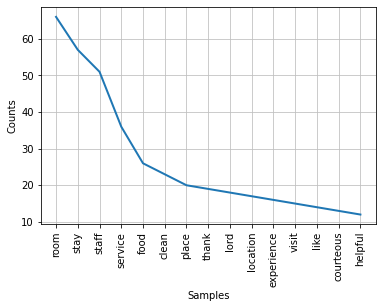

In [177]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(sorted_dict)
frequency_dist.plot(15,cumulative=False)

## Word Cloud

In [178]:
!pip install wordcloud
from wordcloud import WordCloud

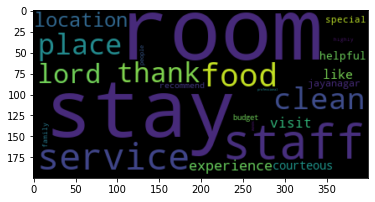

In [179]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')

# Analysis

## Example 1 (Positive Review)

In [199]:
#import libraries
from textblob import TextBlob
#TextBlob has a pre trained sentiment prediction model
blob = TextBlob(df['review_old'][5])
blob.sentiment

Sentiment(polarity=0.5499999999999999, subjectivity=0.6285714285714287)

In [200]:
df['review_old'][5]

'good place good location well maintain neat ambience good courteous staffgood food lot variety good hall small function good facility go'

## Example 2 (Negative Review)

In [203]:
#import libraries
from textblob import TextBlob
#TextBlob has a pre trained sentiment prediction model
blob = TextBlob(df['review_old'][45])
blob.sentiment

Sentiment(polarity=-0.24, subjectivity=0.65)

In [202]:
df['review'][45]

'Rooms we were very dirty. My grandparents stayed in this hotel twice and we did not get hot water in the morning when we wanted to shower. If i call up the reception, the lady said that she cannot do anything as she does  not know what to do. When i spoke to the manager Mr. Sanjeev, he was very very rude and he said you cannot call for every small problem. He told us if we want we can check out. Very very rude of him. He should be fired.'